# Red neuronal aplicada al reconocimiento de imagenes



## Codigo

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
val_dir = 'C:/Users/octav/OneDrive/Documentos/Tesis red neuronal/RN1BC/validation'
train_dir = 'C:/Users/octav/OneDrive/Documentos/Tesis red neuronal/RN1BC/training'
test_dir = 'C:/Users/octav/OneDrive/Documentos/Tesis red neuronal/RN1BC/test'


train_dir_b = train_dir + "/benign"
train_dir_m = train_dir + "/malign"

val_dir_b = val_dir + "/benign"
val_dir_m = val_dir + "/malign"

num_b_tr = len(os.listdir(train_dir_b))
num_m_tr = len(os.listdir(train_dir_m))

num_tst= len(os.listdir(test_dir))

In [3]:
num_b_tr,num_m_tr

(1479, 1479)

In [4]:
num_b_vl = len(os.listdir(val_dir_b))
num_m_vl = len(os.listdir(val_dir_m))

In [5]:
num_b_vl,num_m_vl

(493, 493)

In [6]:
total_train = num_b_tr+num_m_tr
total_val = num_b_vl+num_m_vl
total_train, total_val

(2958, 986)

In [7]:
num_tst

986

In [8]:
data_generator = ImageDataGenerator(rescale=1./250,zoom_range=0.2)

In [9]:
Model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
    
tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='softmax')

])

In [10]:
batch= 100
img_shape = 150
Model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
EPOCHS = 25
val_data_gen = data_generator.flow_from_directory(batch_size =batch,
                                                            directory=val_dir,
                                                            shuffle = False,
                                                            target_size = (img_shape,img_shape),
                                                            class_mode = 'binary')

train_data_gen = data_generator.flow_from_directory(batch_size=batch,
                                                               directory=train_dir,
                                                               shuffle = True,
                                                               target_size = (img_shape,img_shape),
                                                               class_mode = 'binary')

Found 986 images belonging to 2 classes.
Found 2958 images belonging to 2 classes.


## Pruebas 

### Prueba 1 

In [ ]:
history = Model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch))))

Epoch 1/25
30/30 [==============================] - 199s 7s/step - loss: 0.5364 - accuracy: 0.7309 - val_loss: 0.4710 - val_accuracy: 0.7901
Epoch 2/25
30/30 [==============================] - 104s 3s/step - loss: 0.4914 - accuracy: 0.7799 - val_loss: 0.3833 - val_accuracy: 0.8509
Epoch 3/25
30/30 [==============================] - 87s 3s/step - loss: 0.4532 - accuracy: 0.7945 - val_loss: 0.3420 - val_accuracy: 0.8529
Epoch 4/25
30/30 [==============================] - 90s 3s/step - loss: 0.4223 - accuracy: 0.8076 - val_loss: 0.3559 - val_accuracy: 0.8621
Epoch 5/25
30/30 [==============================] - 91s 3s/step - loss: 0.4438 - accuracy: 0.7894 - val_loss: 0.3017 - val_accuracy: 0.8773
Epoch 6/25
30/30 [==============================] - 89s 3s/step - loss: 0.3977 - accuracy: 0.8181 - val_loss: 0.2924 - val_accuracy: 0.8813
Epoch 7/25
30/30 [==============================] - 89s 3s/step - loss: 0.3816 - accuracy: 0.8222 - val_loss: 0.2628 - val_accuracy: 0.8895
Epoch 8/25
30/30 [

### Gráfica y predicción prueba 1

In [12]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

dic = {'C.E':loss_train,'C.V':loss_val,
       'P.E':acc_train,'P.V':acc_val}
data = pd.DataFrame(dic)

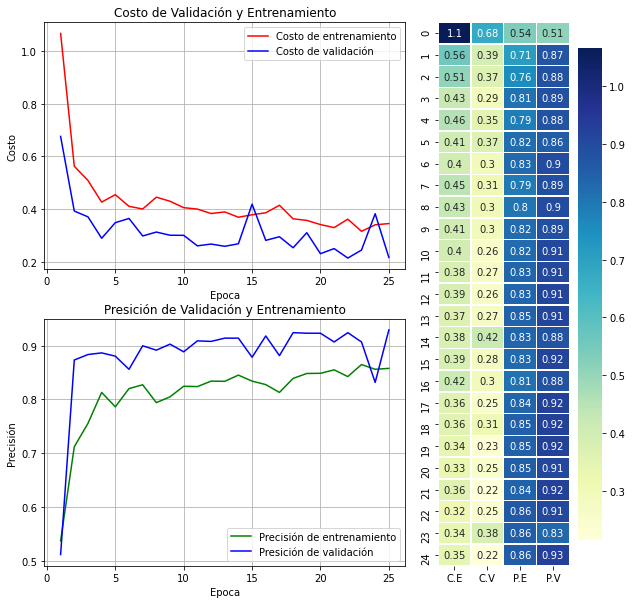

In [13]:
epochs_loss = range(1,len(loss_val)+1)
epochs_val = range(1,len(acc_val)+1)

fig = plt.figure(figsize=(10, 10))

a1 = plt.subplot2grid((2,3),(0,0),colspan = 2)
a2 = plt.subplot2grid((2,3),(0,2), rowspan = 3,colspan = 2)
a3 = plt.subplot2grid((2,3),(1,0),rowspan = 1, colspan = 2)


a1.plot(epochs_loss, loss_train, 'r', label='Costo de entrenamiento')
a1.plot(epochs_loss, loss_val, 'b', label='Costo de validación')
a1.set_title('Costo de Validación y Entrenamiento')
a1.set_xlabel('Epoca')
a1.set_ylabel('Costo')
a1.grid()
a1.legend()

a2 = sns.heatmap(data,cmap="YlGnBu",annot=True,linewidths=.5,ax=a2)

a3.plot(epochs_val, acc_train, 'g', label='Precisión de entrenamiento')
a3.plot(epochs_val, acc_val, 'b', label='Presición de validación')
a3.set_title('Presición de Validación y Entrenamiento')
a3.set_xlabel('Epoca')
a3.set_ylabel('Precisión')
a3.grid()
a3.legend()

In [14]:
def testing_image(image_directory): 
    test_image = image.load_img(image_directory, target_size = (150,150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = Model.predict(x=test_image)
    if result[0][0] == 1:
        prediction = 'Benigno'
    else:
        prediction = 'Maligno'
    return prediction

In [17]:
#im_num =input('¿Qué número de imagen desea analizar? ')
print(testing_image(test_dir+"/im (1).png"),testing_image(test_dir+"/im (986).png"))
print(testing_image(test_dir+"/im (450).png"),testing_image(test_dir+"/im (123).png"))
print(testing_image(test_dir+"/im (47).png"),testing_image(test_dir+"/im (850).png"))
print(testing_image(test_dir+"/im (652).png"),testing_image(test_dir+"/im (75).png"))
print(testing_image(test_dir+"/im (98).png"),testing_image(test_dir+"/im (410).png"))

Benigno Maligno
Benigno Maligno
Benigno Benigno
Maligno Maligno
Benigno Benigno


¿Cuántas imagénes desea analizar? 10
¿Qué número de imagen desea analizar? 1
¿Qué número de imagen desea analizar? 986
¿Qué número de imagen desea analizar? 450
¿Qué número de imagen desea analizar? 123
¿Qué número de imagen desea analizar? 47
¿Qué número de imagen desea analizar? 850
¿Qué número de imagen desea analizar? 652
¿Qué número de imagen desea analizar? 75
¿Qué número de imagen desea analizar? 98
¿Qué número de imagen desea analizar? 410


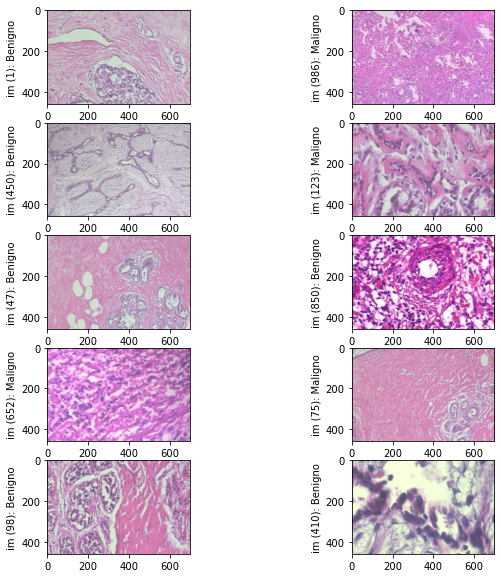

In [18]:
fig=plt.figure(figsize=(10, 10))
columns = 2
rows = 5

k = int(input('¿Cuántas imagénes desea analizar? '))
for i in range(1,k+1):
    im_num =input('¿Qué número de imagen desea analizar? ') #Puede escoger desde 1 hasta 986
    image_directory = test_dir+"/im ("+im_num+").png"
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image.open(image_directory))
    plt.ylabel("im ("+im_num+"): "+str(testing_image(image_directory)))